<a href="https://colab.research.google.com/github/cicyfan/machine-learning-fundamentals/blob/master/3_iris_classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the K-NN algorithm for classification of iris

In this assigment, you will classify if an Iris is 'Iris Setosa' or 'Iris Versicolour' or 'Iris Virginica' using the k nearest neighbor algorithm.

The training data is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/iris.  Please download the dataset before running the code below. 

## Step 1:  Getting, understanding, and cleaning the dataset


###  Importing the dataset


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Import the usual libraries
import matplotlib.pyplot as plt # plotting utilities 
%matplotlib inline
import numpy as np 
import pandas as pd  # To read in the dataset we will use the Panda's library
path = '/content/drive/My Drive/data/'
df = pd.read_csv(path+'iris.data', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width", "label"])

# Next we observe the first 5 rows of the data to ensure everything was read correctly
df.head()

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data preprocesssing
It would be more convenient if the labels were integers instead of 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.  This way our code can always work with numerical values instead of strings.

In [0]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})
df.head()# Again, lets observe the first 5 rows to make sure everything worked before we continue

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","petal width"]
#After completing the assignment, try your code with all the features
#names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width"]
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train.shape[0])
print("The number of test exampels: ", X_test.shape[0])

print("The first four training labels")
print(y_train[0:4])

print("The first four iris' measurements")
print(X_test[0:4])

The number of training examples:  112
The number of test exampels:  38
The first four training labels
[1 1 2 0]
The first four iris' measurements
[[5.8 2.4]
 [6.  1. ]
 [5.5 0.2]
 [7.3 1.8]]


## visualizing the data set

Using a scatter plot to visualize the dataset

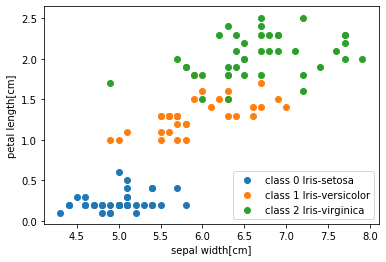

In [0]:
iris_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(0,3):
    plt.scatter(X_train[y_train == i, 0],
                X_train[y_train == i, 1],
            marker='o',
            label='class '+ str(i)+ ' '+ iris_names[i])

plt.xlabel('sepal width[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='lower right')

plt.show()

# Your code goes here

##KNN implmentation

In [0]:
from scipy.spatial import distance

def euclidean_distance(x1, x2):
   return np.sqrt(np.sum((x1 - x2) ** 2))

In [0]:
def get_neighbors(X_train, y_train, x_test, k, distance=euclidean_distance):
   dis = []
   for i in range(len(y_train)):
        dis.append([distance(X_train[i], x_test), y_train[i]])
   #dis.sort(key=lambda dis:dis[0])
   dis = np.array(dis)
   sorted_dis = dis[dis[:,0].argsort()]
   neighbors = sorted_dis[:k]
   return neighbors

In [0]:
def get_label(neighbors):
    labels = neighbors[:,1]
    labels, count = np.unique(labels, return_counts=True)
    return labels[np.argmax(count)]

In [0]:
from sklearn.metrics import accuracy_score
def KNNResults(k, distance):
  y_pred = []
  for x_test in X_test:
      neighbors = get_neighbors(X_train, y_train, x_test, k, distance=distance)
      label = get_label(neighbors)
      y_pred.append(label)
  print("Errors:")
  for i, label in enumerate(y_pred):
      if label != y_test[i]:
          print(i, X_test[i])
  accuracy = accuracy_score(y_pred, y_test)
  print("when k = {}, the accuracy is {}".format(k, accuracy))

## Results for K=1,3,5

In [0]:
KNNResults(1, euclidean_distance)

Errors:
10 [6.1 1.4]
16 [6.  1.5]
when k = 1, the accuracy is 0.9473684210526315


In [0]:
KNNResults(3, euclidean_distance)

Errors:
10 [6.1 1.4]
when k = 3, the accuracy is 0.9736842105263158


In [0]:
KNNResults(5, euclidean_distance)

Errors:
10 [6.1 1.4]
when k = 5, the accuracy is 0.9736842105263158


KNN library to check if KNN was implmented correctly

In [0]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
for i, label in enumerate(y_pred):
      if label != y_test[i]:
          print(i, X_test[i])
print(accuracy)

10 [6.1 1.4]
16 [6.  1.5]
0.9473684210526315


## Zero-R

In [0]:
labels, count = np.unique(y_train, return_counts=True)
print(labels, count)

[0 1 2] [37 34 41]


In [0]:
accuracy_score(np.full(y_test.shape[0], labels[np.argmax(count)]), y_test)

0.23684210526315788

## Manhattan Distance Function

In [0]:
def manhattan_distance(x1, x2):
  d = distance.cityblock(x1, x2)
  return d

In [0]:
KNNResults(1, manhattan_distance)

Errors:
10 [6.1 1.4]
16 [6.  1.5]
when k = 1, the accuracy is 0.9473684210526315


In [0]:
KNNResults(3, manhattan_distance)

Errors:
10 [6.1 1.4]
when k = 3, the accuracy is 0.9736842105263158


In [0]:
KNNResults(5, manhattan_distance)

Errors:
10 [6.1 1.4]
37 [6.  1.6]
when k = 5, the accuracy is 0.9473684210526315


## 5-fold cross-validation

In [0]:
X_train_split = np.array_split(np.concatenate((X_train, X_test)), 5)
y_train_split = np.array_split(np.concatenate((y_train, y_test)), 5)
X_test_cv = X_train_split[4]
y_test_cv = y_train_split[4]

def cross_validate(k, distance):
  result = []
  for j in range(4):
    y_pred = []
    for x_test in X_test_cv:
        neighbors = get_neighbors(X_train_split[j], y_train_split[j], x_test, k, distance=distance)
        label = get_label(neighbors)
        y_pred.append(label)
    print("Fold", j+1, "Errors:")
    for i, label in enumerate(y_pred):
        if label != y_test_cv[i]:
            print(i, X_test_cv[i])
    accuracy = accuracy_score(y_pred, y_test_cv)
    result.append(accuracy)
    print("when k = {}, the accuracy is {}".format(k, accuracy))
  print("Average accuracy: ", np.average(result))

In [0]:
cross_validate(3, euclidean_distance)

Fold 1 Errors:
0 [6.8 1.4]
2 [6.1 1.4]
3 [6.4 1.5]
5 [6.5 1.5]
12 [5.6 2. ]
19 [6.2 1.3]
when k = 3, the accuracy is 0.8
Fold 2 Errors:
2 [6.1 1.4]
when k = 3, the accuracy is 0.9666666666666667
Fold 3 Errors:
2 [6.1 1.4]
12 [5.6 2. ]
16 [6.2 1.8]
22 [6.4 1.8]
when k = 3, the accuracy is 0.8666666666666667
Fold 4 Errors:
2 [6.1 1.4]
16 [6.2 1.8]
22 [6.4 1.8]
when k = 3, the accuracy is 0.9
Average accuracy:  0.8833333333333333


In [0]:
cross_validate(7, euclidean_distance)

Fold 1 Errors:
0 [6.8 1.4]
2 [6.1 1.4]
3 [6.4 1.5]
5 [6.5 1.5]
12 [5.6 2. ]
28 [5.7 0.3]
when k = 7, the accuracy is 0.8
Fold 2 Errors:
0 [6.8 1.4]
1 [6.1 1.3]
3 [6.4 1.5]
5 [6.5 1.5]
6 [6.1 1.4]
8 [6.  1.5]
20 [5. 1.]
29 [6.  1.6]
when k = 7, the accuracy is 0.7333333333333333
Fold 3 Errors:
0 [6.8 1.4]
2 [6.1 1.4]
12 [5.6 2. ]
16 [6.2 1.8]
20 [5. 1.]
25 [6.1 1.8]
when k = 7, the accuracy is 0.8
Fold 4 Errors:
2 [6.1 1.4]
16 [6.2 1.8]
22 [6.4 1.8]
25 [6.1 1.8]
when k = 7, the accuracy is 0.8666666666666667
Average accuracy:  0.7999999999999999


In [0]:
cross_validate(9, euclidean_distance)

Fold 1 Errors:
0 [6.8 1.4]
2 [6.1 1.4]
3 [6.4 1.5]
5 [6.5 1.5]
7 [4.9 0.1]
10 [4.8 0.3]
11 [5.4 0.4]
12 [5.6 2. ]
14 [4.8 0.2]
17 [4.6 0.2]
18 [5.1 0.4]
21 [5.  0.4]
24 [5.2 0.2]
28 [5.7 0.3]
29 [6.  1.6]
when k = 9, the accuracy is 0.5
Fold 2 Errors:
0 [6.8 1.4]
1 [6.1 1.3]
3 [6.4 1.5]
5 [6.5 1.5]
6 [6.1 1.4]
8 [6.  1.5]
13 [5.6 1.5]
19 [6.2 1.3]
20 [5. 1.]
29 [6.  1.6]
when k = 9, the accuracy is 0.6666666666666666
Fold 3 Errors:
0 [6.8 1.4]
2 [6.1 1.4]
12 [5.6 2. ]
16 [6.2 1.8]
20 [5. 1.]
22 [6.4 1.8]
25 [6.1 1.8]
27 [5.2 1.4]
when k = 9, the accuracy is 0.7333333333333333
Fold 4 Errors:
2 [6.1 1.4]
16 [6.2 1.8]
20 [5. 1.]
22 [6.4 1.8]
25 [6.1 1.8]
when k = 9, the accuracy is 0.8333333333333334
Average accuracy:  0.6833333333333333
